# Ermittlung der Fahrqualität von Fahrradwegen mit Fuzzy Logik

## Einleitung

Mit Fuzzy Logik wurde die Oberflächenqualität von Fahrradwegen eingeordnet nach dem Kriterium der Fahrqualität. Hierfür wurden unterschiedliche Regeln und Merkmale der erfassten Daten untersucht. Im Gegensatz zu klassischen Logik gibt es bei der Fuzzy Logik nicht nur Wahrheitswerte 0 für falsch oder 1 für eine wahre Aussage, sondern es gibt Wahrheitswerte zwischen 0 und 1 mit einem Wahrheitsgehaltwert $\mu$. Damit ist es möglich eine stetige Menge zu beschreiben. Diese Menge siehe Def. 1 wird als Fuzzy-Menge definiert. Dabei wird jeden Element $x$ Teil der Grundmenge $G$ einen Wahrheitsgehaltwert $\mu$ zugeordnet. Der Vorteil bei der Verwendung von Fuzzy Logik gegenüber Clustering Verfahren wie KMeans ist es menschliches Kausalwissen oder Verhaltensweisen zu mathematisieren. Ein Eingangswert $x$ kann mit einem Zugehörigkeitsgrad $\mu$ einem linguistischen Wert $LW$ zugeordnet werden.

$F:= \lbrace (x,\mu(x)) \: \vert \: x \in G$ und $\mu(x) \in [0,1] \rbrace$
<div style="text-align: right"><i>(Definition 1)</i></div>

## Versuchsbeschreibung

Für die Einordnung der Daten in Klassen wurden Regeln benötigt. Diese wurden dann in eine mathematische Gleichung umgewandelt. Die Frage die experimentell zu beantworten galt ist, welche Regeln sind sinnvoll. Die Anzahl der Repräsentanten für jede Klasse sollte ungefähr gleich sein. Um später ein einseitiges Lernen mit Faltungsnetzen zu vermeiden. Als Merkmal wurde die Standardabweichung der Z-Achsen Beschleunigung $a$ und die Geschwindigkeit untersucht. 

## Hypothese 

Die Hypothese ist, dass die Geschwindigkeit als Merkmal relevant ist, weil bei einer steigenden Geschwindigkeit auch die Bewegungsunschärfe zunimmt. Allerdings erhöht eine starke Erschütterung oder eine lange Belichtungszeit auch die unschärfer der Bildaufnahme. In diesem Versuchen wurde auch untersucht ob eine Unterteilung der Daten anhand der Geschwindigkeit zu einem besseren Ergebnis im Sinne der Genauigkeit bei der Klassifizierung führt.
In den Versuchen wurde die Bibliothek [Scikit Fuzzy (skfuzzy)](https://pythonhosted.org/scikit-fuzzy/) genutzt.

### Fuzzy System

Mit einer nicht nichtlinearen Funktion siehe G. 2 kann ein Fuzzy System beschrieben werden. Dabei sind die Eingangsgrößen als $x_i$ und die Ausgangsgrößen als $y_i$ definiert. Ziel ist es sprachliche Regeln wie die folgende Implikation in eine mathematische Gleichung umzuformen. Wenn die Erschütterung $x$ sehr hoch ist und die Geschwindigkeit $v$ niedrig ist, dann ist die Fahrqualität $y$ sehr schlecht. 


$y_{res} = f(x_1, ...,x_n)$
<div style="text-align: right"><i>Fuzzy System als Funktion (2)</i></div>

Ein Fuzzy System besteht aus mehreren Funktionen. Diese werden nun nach der Reihenfolge ihrer Ausführung beschrieben. 
Bei der Fuzzifizierung siehe G. 3 werden zu den Eingangsgrößen $x_i$ die Zugehörigkeitswerte bestimmt. Dabei gibt $LW_{i,j}$ die linguistischen Werte der Eingangsgröße $x_i$ an mit $j=1, ...,q$ und $q$ steht für die Anzahl der linguistischen Werte.

$\mu_{LW_{i,j}}(x_i)$
<div style="text-align: right"><i>Fuzzifizierung (3)</i></div>

Die Aggregation siehe G. 4 ist die Ausführung der "und" Verknüpfung der Implikation. Die Funktion $min\lbrace \mu_a,\mu_b \rbrace$ ist die Fuzzy-Und-Verknüpung und gibt alle Werte zurück bei welchem sich der Wahrheitswert $\mu$ überschneidet. Als Fuzzy-Oder-Verknüpfung wird die Funktion $max\lbrace\mu_a,\mu_b\rbrace$ definiert. Diese gibt alle Wahrheitswerte $\mu$ zurück ähnlich dem oder in der booleschen Logik aber mit stetigen Werten. 

$\mu_{agg,k}(x_i, ...,x_n)=min\lbrace \mu_{LW_{1,i}}(x_1),...,\mu_{LW_{n,p}}(x_n)\rbrace$ <br />
$k = 1, ..., m$
<div style="text-align: right"><i>Aggregation (4)</i></div>

Dann definiert G. 5 die Schlussfolgerung der Implikation. Die Akkumulation siehe G. 6 beschreibt die Überlagerung der Ergebnisse der Implikation.  

$\mu_k(x_1, ...,x_n,y)=min\lbrace\mu_{agg,k}(x_1,...,x_n),\mu_{LW_{k}}(y)\rbrace$ <br />
$k = 1, ..., m$
<div style="text-align: right"><i>Implikation (5)</i></div>

$\mu_{res}(x_1, ...,x_n,y)=max\lbrace\mu_1(x_1,...,x_n,y),...,\mu_m(x_1,...,x_n,y)\rbrace$ <br />
<div style="text-align: right"><i>Akkumulation (6)</i></div>

Als letztes wird die Defuzzifizierung ausgeführt siehe G.7. Dabei wird die Ausgangsgröße $y_{res}$ bestimmt. Für die Defuzzierung wird die Operation Mean of Maxima (MOM) angewendet. Dabei ist $C_{max}$ die Menge aller Maximalstellen von $y$. Das Ergebnis ist der Mittelwert aller Maximalstellen. Es gibt für jede Funktion weitere Rechenoperationen wie Minimum, Maximum, Produkt, Summe oder Differenz. Für die folgenden Versuche werden wie in den G. 4 bis 7 die beschriebenen Operationen auf der rechten Seite der Gleichungen genutzt.   

$y_{res}=\frac{\int \limits_{y\in C_{max}} y\:dy}{\int \limits_{y\in C_{max}} y\:dy}$
<div style="text-align: right"><i>Defuzzifizierung (7)</i></div>

### Versuch 1: Referenzstrecken

#### Versuchsbeschreibung

Um die Standardabweichung der Z-Achsen Beschleunigung zu unterteilen in erschütterungs Abstufungen wurden sinnvolle Grenzwerte benötigt. Die erste Überlegung war die Dateien gleichmäßig zu unterteilen indem die Daten anhand der Erschütterung sortiert werden.  Der Nachteil ist, dass die Werte nicht gleichmäßig verteilt sind (siehe Abb. 1). Die Werte auf das Intervall [0,1] zu normieren und dann einen Prozentwert als Unterteilung zu wählen ist auch nicht sinnvoll. Der Wertebereich ist nämlich nicht gleichmäßig verteilt.

<img src="../daten/abbildungen/histogrammStandardabweichung.png" alt="Histogramm der Z-Achsen Standardabweichung Beschleunigung" />
Abbildung 1: Histogramm der Z-Achsen Beschleunigung Standardabweichung für die Datensätze 37 bis 42

Die Idee war dann mit Referenzstrecken für eine leichte und hohe Erschütterung eine Unterteilung vorzunehmen. Es wurden in diesem Versuch also zwei Referenzstrecken gesucht, eine mit leichter und eine mit hoher Erschütterung.  
 
#### Versuchsaufbau

Für die Referenzstrecken wurde jeweils ein Abschnitt ausgewählt aus Datensatz 38, welcher von der Unebenheit bzw. Rauigkeit möglichst gleichbleibend war. Dabei wurden für die Zwischenstufen von leicht bis zu einer hohen Erschütterung die Mittelwerte der Standardabweichung genutzt. Der Mittelwert von der Z-Achsen Standardabweichung wurde dann als Maximalwert $\mu$ gewählt für die Zuordnungsfunktion des Fuzzy Systems. 

#### Ergebnis

Wie auf Abb. 2 zu sehen ist der Radweg asphaltiert und weist nur geringe Unebenheiten auf.  Der Mittelwert der Standardabweichung der Z-Achsen Beschleunigung beträgt $\approx 1.5 m/s^2$.

<img src="../daten/abbildungen/leichteErschuetterungReferenzstrecke.png" alt="Radweg aus Asphalt mit wenigen Unebenheiten"/>

Abbildung 2: Radweg aus Asphalt mit wenigen Unebenheiten

Dagegen ist auf Abb. 3 als Beispiel ein Kiesweg mit vermutlich hoher Erschütterung zu sehen, wenn dieser mit einem Fahrrad befahren wird. Auf OpenStreetMap hat der Weg das tag unbefestigt mit einer Qualität von 2. Für die unterschiedliche Einstufung der Qualität von Oberflächen siehe die [Wiki](https://wiki.openstreetmap.org/wiki/Proposed_features/Surface_Quality) Website von OpenStreetMap. Bei diesem Beispiel beträgt der Mittelwert der Z-Achsen Standardabweichung $\approx 7,3m/s^2$.

<img src="../daten/abbildungen/schwereErschuetterungReferenzstrecke.png" alt="Radweg aus groben Kies" />

Abbildung 3: Radweg aus groben Kies 

### Versuch 2: Regelbasierte Klassifizierung der Daten durch die Standardabweichung Z-Achsen Beschleunigung

#### Versuchsbeschreibung

Durch die Ergebnisse des vorherigen Versuchs wurde die Fahrqualität eingeteilt in 4 Stufen. Die Einteilung orientierte sich an dem OSM Attribut [smoothness](https://wiki.openstreetmap.org/wiki/Key:smoothness) für Wege. Die Gleichmäßigkeit der Oberfläche wird mit den Attribut in 8 Stufen unterschieden von hervorragend bis nicht passierbar. Bei diesem Versuch ist die Anzahl der unterschiedlichen Klassen auf die Hälfte reduziert. Die Hypothese ist, dass dadurch die Klassifizierung vereinfacht werden kann.     


#### Versuchsaubau 

Die Daten aus den Datensätzen 37 bis 42 wurden klassifiziert anhand der gemessenen Standardabweichung der Z-Achsen Beschleunigung. Hierbei wurde für den Schritt der Fuzzifizierung die Ergebnisse aus den letzten Versuch genutzt. Für das Fuzzy System wurde die Regelbasis aus Tab. 1 verwendet.  

|  | sehr leichte Erschütterung | leichte  Erschütterung | hohe Erschütterung | sehr hohe Erschütterung |
| --- | --- | --- | --- | --- |
| <b>Fahrqualität | sehr gut | gut | schlecht | sehr schlecht |
Tabelle 1: Regelbasis für Versuch 2
    
#### Ergebnis 

Auf Abb. 4 ist zu sehen wie die Eingangsgrößen auf linguistische Werte $LW$ abgebildet wurden. Dabei wurde eine Trapezfunktion für die Werte sehr gut und sehr schlecht genutzt. Um alle Werte kleiner und größer als die Mittelwerte der Standardabweichung der Z-Achsen Beschleunigung von den Referenzstrecken zuzuordnen. Für die Erschütterungswerte gut und schlecht wurden Dreiecksfunktionen genutzt. Die Eingangsgrößen haben eine Genauigkeit von 3 Kommastellen.

<img src="../daten/abbildungen/fuzzifizierungVersuch2.png" alt="Versuch 2 fuzzifizierung" />
Abbildung 4: Fuzzifizierung mit 4 unterschiedlichen Erschütterungs Abstufungen

In der Abb. 5 sind die Ausgangsgrößen des Fuzzy Systems definiert. Als Beispiel wurde für die Eingangsgröße die Standardabweichung der Z-Achsen Beschleunigung von $a=3m/s^2$ gewählt. Auf der Abb. 6 ist zu sehen, dass der Eingangswert zu der Klasse 1 zugeordnet wurde.

<img src="../daten/abbildungen/fahrqualitaetVersuch2.png" alt="Versuch 2 Fahrqualität" />
Abbildung 5: Gleichmäßigkeit bzw. Fahrqualität als Ausgangsgrößen des Fuzzy Systems 

<img src="../daten/abbildungen/defuzzifizierungValue3_Versuch2.png" alt="Versuch 2 Defuzzifizierung mit Standardabweichung der Z-Achsen Beschleunigung von 3m/s^2" />
Abbildung 6: Defuzzifizierung mit der gegebenen Eingangsgröße von $a=3m/s^2$ der Standardabweichung$

<img src="../daten/abbildungen/histogrammKlassenVersuch4_2.png" alt="Histogramm Klassen Versuch 4.2" />
Abbildung 7: Histogramm der Klassen

Abbildung 7 zeigt die Anzahl der Daten pro Klassen. Die Vermutung ist, dass die Einteilung mit der Regel "sehr schlecht" nicht korrekt ist. Überwiegend wurden die Daten in der Stadt Hamburg aufgenommen, wobei hohe Erschütterungen eher selten sind siehe Abb. 1. Ein Vorteil bei dieser Regel mit geringen Schwellwert ist allerdings das die Daten gleichmäßiger verteilt sind.

### Versuch 3: Regeln mit Geschwindigkeits Unterteilung

#### Versuchsaufbau 

Für Versuch 3 wurde die Regelbasis angepasst siehe Tab. 2. Die Tabelle ist so zu interpretieren das die linguistischen Ausgangsgrößen zusätzlich erweitert wurden nach der Unterscheidung einer niedrigen und einer hohen Geschwindigkeit. Der Medianwert der Geschwindigkeit in km/h beträgt $16.02 km/h$. Als Grenzwert wurden für diesen Versuch dann $16 km/h$ gewählt. Eine Geschwindigkeit über $16km/h$ über gilt als hohe Geschwindigkeit. Ein Nachteil an dieser herangehensweise ist, das der Medianwert nicht viel aussagt über die Bewegungsunschärfe.       

|  | sehr leichte Erschütterung | leichte  Erschütterung | hohe Erschütterung | sehr hohe Erschütterung |
| --- | --- | --- | --- | --- |
| <b>niedrige Geschwindigkeit | sehr gut / niedrige Geschwindigkeit | gut / niedrige Geschwindigkeit | schlecht / niedrige Geschwindigkeit| sehr schlecht / niedrige Geschwindigkeit |
| <b>hohe Geschwindigkeit | sehr gut / hohe Geschwindigkeit | gut / hohe Geschwindigkeit | schlecht / hohe Geschwindigkeit | sehr schlecht / hohe Geschwindigkeit|    
Tabelle 2: Regelbasis für Versuch 3
    
#### Ergebnis  

Auf Abb. 8 ist die Zuordnung der Geschwindigkeit zu sehen in niedrige oder hohe Geschwindigkeit. Die Ausgangsgrößen Zuordnungsfunktion ist auf Abb. 9 abgebildet, um die Ähnlichkeit der Klassen bei niedriger und hoher Geschwindigkeit hervorzuheben wurden die Farben ab Klasse 4 wiederholt. Ein Einblick in die Verteilung der Häufigkeit der Klassen bietet Abb. 10.   

<img src="../daten/abbildungen/fuzzifizierungGeschwindigkeitVersuch3.png" alt="Fuzzifizierung der Geschwindigkeit" />
Abbildung 8: Fuzzifizierung der Geschwindigkeit

<img src="../daten/abbildungen/fahrqualitaetVersuch3.png" alt="Ausgangsgrößen" />
Abbildung 9: Ausgangsgrößen

<img src="../daten/abbildungen/histogrammKlassenFuzzyVersuch3.png" alt="Histogramm Versuch 3" />
Abbildung 10: Histogramm Versuch 3

###  Versuch 4: Reduzierung der Ausgangsgrößen und Anpassung der Erschütterungs -Regeln

#### Versuchsaufbau

Aus den Ergebnissen von Faltungsnetz Versuch 4 ist die Hypothese entstanden, dass die aufgestellte Regelbasis nicht geeignet ist für diese Aufgabe.
Besonders häufig wurde die Klasse "sehr gut" Klassifiziert siehe Konfusionsmatrix aus den Abb. 4.3 aus den Notebook CNN_eperiment4.ipynb. Daher wurde der Grenzwert für die Fahrqualität "sehr schlecht" angehoben auf $10m/s^2$ Standardabweichung der Z-Achsen Beschleunigung. Um die Klasse mehr abzugrenzen. Die Anzahl der Ausgangsgrößen wurde auf 3 reduziert. Auch aus dem Versuch heraus die Klassen mehr voneinander zu unterscheiden.

|  | leichte Erschütterung | mittlere  Erschütterung | hohe Erschütterung | 
| --- | --- | --- | --- | --- |
| <b>Fahrqualität | gut | mittel | schlecht | 
Tabelle 3: Regelbasis für Versuch 4 mit 3 Ausgangsgrößen 
    
#### Ergebnis

<img src="../daten/abbildungen/fahrqualitaetVersuch4.png" alt="Ausgangsgrößen Versuch 4" />
Abbildung 11: Ausgangsgrößen 

Wie auf Abb. 11 zu sehen wurde bei den Labeln der Daten unterschieden zwischen drei Klassen. Die beschriebenen geänderten Grenzwerte sind auf Abb. 12 zu sehen. Nach der Zuordnung der Daten hat die Klasse 2 also Radwege mit schlechter Fahrqualität die geringste Anzahl mit 12290 Bildaufnahmen (siehe Abb. 13).

<img src="../daten/abbildungen/fuzzifizierungZAchseVersuch4.png" alt="Fuzzifizierung Versuch 4" />
Abbildung 12: Fuzzifizierung in die linguistische Variablen leichte, mittlere und hohe Erschütterung

<img src="../daten/abbildungen/histogrammKlassenFuzzyVersuch4.png" alt="Häufigkeit der zugeordneten Klassen Versuch 4" />
Abbildung 13: Häufigkeit der zugeordneten Klassen

###  Versuch 5: Kombination aus Versuch 3 und 4

#### Versuchsaufbau 

In diesem Versuch ging es darum die Datensätze 37-42 in zwei Geschwindigkeitsbereiche zu unterteilen und dabei die Regeln für die Erschütterung und der Fahrqualität aus Versuch 4 zu nutzen. Die Motivation kommt von den Ergebnissen aus Faltungsnetz Versuch 4.5 und 4.6. Auch für die Regeln aus Versuch 4 wurde überprüft, ob es sinnvoll ist für zwei unterschiedliche Geschwindigkeitsbereich jeweils ein Faltungsnetz zu trainieren.

#### Ergebnis 

Die Häufigkeit der vorkommenden Klassen nach der Zuordnung ist auf Abb. 14 zu sehen. Hier bei fällt auf, dass die Klasse Fahrqualität schlecht und Geschwindigkeit niedrig siehe Abb. 15 nur 5684 Mal vorkam.

<img src="../daten/abbildungen/histogrammKlassenFuzzyVersuch5.png" alt="Histogramm der Klassen Versuch 5" />
Abbildung 14: Verteilung der Klassen Häufigkeit Versuch 5

<img src="../daten/abbildungen/fahrqualitaetVersuch5.png" alt="Klassen Versuch 5" />
Abbildung 15: Ausgangsgrößen bzw. Klassen für Versuch 5

## Zusammenfassung Versuche 1-5

In Versuch 1 wurde nach geeigneten Regeln für die Erschütterung gesucht. Dabei wurden zwei Referenzstrecken untersucht für eine leichte und eine hohe Erschütterung siehe Abb. 2 und 3.
Von diesem Radweg abschnitten wurde der Mittelwert der Z-Achsen Standardabweichung Beschleunigung berechnet. 

Die ermittelten Werte wurden dann als obere Grenzwerte für eine "sehr leichte" und einer "sehr hohe" Erschütterung in Versuch 2 verwendet (siehe Abb. 4). Bei der Klassifizierung in Versuch 2 wurde anhand der Erschütterung die Daten in 4 Klassen nach der Fahrqualität unterteilt siehe Abb. 5. Am häufigsten kamen die Klassen "gut" und "schlecht" vor (siehe Abb. 7).

Dann wurde indem Versuch 3 zusätzlich der Geschwindigkeitsbereich zwischen niedrig und hoch unterschieden. Mit dem Ziel jeweils ein Faltungsnetz für einen Bereich zu trainieren. 

Bei Versuch 4 wurde die Zuordnung zu der Erschütterung "hoch" erhöht siehe Abb. 12. Dies wurde aus den Grund gemacht damit sich Klassen sich mehr voneinander unterschieden. Zudem wurde die Anzahl der Klassen auf 3 reduziert nämlich "gut", "mittel" bzw. "mittelmäßig", "schlecht". 

Wie in Versuch 3 wurden die Ergebnisse aus Versuch 4 in Versuch 5 nochmal nach der Geschwindigkeit unterteilt. hierbei ist besonders aufgefallen, dass die Häufigkeit der Klasse "schlecht" gering war (Abb. 14).   

### Versuch 6: Datensätze 43 und 45 bis 51

### Einleitung 

Ein neuer Abschnitt beginnt hier bei der es um die Klassifizierung der Datensätze 43 und 45 bis 51 ging. 
Bei der Datenerfassung wurde eine Route im Naturschutzgebiet Höltigbaum wiederholt befahren siehe auch das Jupyter Notebook CNN_experiment5.ipynb für weitere Informationen.

### Versuchsbeschreibung

Die Klassifizierung erfolgte nach den Regeln aus dem Versuch 4. Mit der Argumentation, dass diese nach dem Ergebnis aus Faltungsnetz Versuch 4.7 vielversprechend erschienen.

### Ergebnis 

Wie auf Abb. 16 zu sehen hat die Klasse schlecht mit 22536 Daten die geringste Anzahl an Daten. Dies sind deutlich mehr als in Versuch 4 mit 12290 Daten für die Klassen mit der geringsten Anzahl an Daten. Auffällig ist die hohe Anzahl an Daten für die Klasse mittel.

<img src="../daten/abbildungen/histogrammKlassenFuzzyVersuch6.png" alt="Histogramm der Klassen von Versuch 6" />
Abbildung 16: Histogramm der Klassen Versuch 6

### Versuch 7: Versuch 6 mit Unterscheidung des Geschwindigkeitsbereich

#### Einleitung 

In diesem Versuch wurde zusätzlich zu Versuch 6 der Geschwindigkeitsbereich unterschieden wie in Versuch 5.

#### Versuchsaufbau

Die zu Klassifizierenden Daten entstammen aus dem Datensätzen 43 und 45 bis 51.

#### Ergebnis

Auf Abb. 17 ist die Häufigkeit der Klassen zu sehen. Die Klasse 0 "Fahrqualität gut/Geschwindigkeit niedrig" hat nur 10281 Daten. 

<img src="../daten/abbildungen/histogrammKlassenFuzzyVersuch7.png" alt="" />
Abbildung 17: Verteilung der Klassen nach Versuch 7

### Versuch 8

#### Einleitung

Als abschließender Test sollte ein kompletter Datensatz mit dem Faltungsnetz aus Versuch 5.5 klassifiziert werden. Mit Fuzzy Logik Versuch 6 wurden die Daten zum Berechnen der Test accuracy gelabelt. Das Ergebnis ist auf Abb. 18 zu sehen. Hierbei ist aufgefallen, dass die Klasse mittelmäßig zu häufig vorhergesagt wurde. Nach jeweils $20m$ zurückgelegter Radweg beginnt ein neuer Abschnitt. Die Klasse mit der größten absoluten Häufigkeit während des Abschnitts wurde in der Abb. 19 dargestellt.    

<img src="../daten/abbildungen/karteFuzzyVersuch6_datensatz52.png" alt="Karte mit labeln von Datensatz 52 aus Fuzzy Versuch 6" />
Abbildung 18: Karte mit labeln, wobei ein neuer Wegabschnitt nach $20m$ beginnt.  

<img src="../daten/abbildungen/karteFuzzyVersuch6_datensatz52Abschnitt.png" alt="Wegabschnitt mit labeln von Datensatz 52 aus Fuzzy Versuch 6" />
Abbildung 19: Wegabschnitt

#### Hypothese

Erwartet wurde das die Klasse Fahrqualität gut häufiger klassifiziert wurde. In der Abb. 19 sollte der Weg eigentlich durchgängig der Klasse gut entsprechen, weil der Weg asphaltiert ist. Durch anpassen der Fuzzy Logik regeln sollte sich die Test accuracy aus Versuch 5.4  erhöhen.  

#### Versuchsaufbau

Die Regeln für die Fuzzifizierung der Eingangsdaten sollte so angepasst werden, dass die Klasse gut häufiger gelabelt wird. Die Daten aus Datensatz 43, 45 bis 51 wurden gelabelt.

#### Ergebnis

Mit der angepassten Fuzzifizierung der Eingangswerte siehe Abb. 20 entsprecht der Wegabschnitt nach der Klassifizierung überweigend der Klasse gut. 

<img src="../daten/abbildungen/fuzzifizierungZAchseVersuch8.png" alt=" Angepasste Fuzzifizierung der Erschütterungszuordnung" />
Abbildung 20: Angepasste Fuzzifizierung der Erschütterungszuordnung

<img src="../daten/abbildungen/karteFuzzyVersuch8_1_datensatz52Abschnitt.png" />

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas 
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
featuresDf = pandas.read_csv(filepath_or_buffer="../daten/merkmale_datensatz_43_45_bis_51/optimiertXception/merkmale.csv")

### Versuch 1

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Standardabweichung Z-Achse Beschleunigung in $m/s^2$')

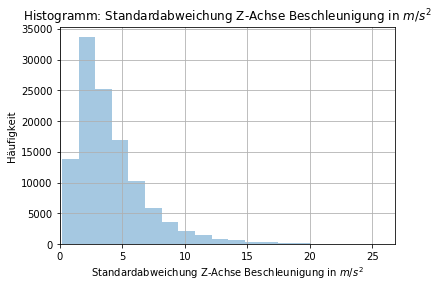

In [3]:
plt.title("Histogramm: Standardabweichung Z-Achse Beschleunigung in $m/s^2$")
sns.distplot(featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'], bins=20, kde=False)
plt.xlim(0,featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'].max())
plt.grid()
plt.ylabel('Häufigkeit')
plt.xlabel('Standardabweichung Z-Achse Beschleunigung in $m/s^2$')
#plt.savefig("histogrammStandardabweichung")

In [5]:
# Lade Bilder in eine Liste
images = []
# Hier können die Datensätze ausgewählt werden
datasets = ['38']
# Die Pfade zu den Ordnern in welchem sich die Bilder befinden
paths = []

In [6]:
for dataset in datasets: # Für jeden Datensatz merke Pfad
    paths.append("C:/Users/morro/Documents/datenRoh/" + dataset + "/zugeschnitten/")
for path in paths: # Für jeden Pfad hole die Namen der Ordner
    folders = os.listdir(path)
    folders = sorted(folders, key=int) #sortiert die Reihenfolge de Ordner aufsteifend
    for folder in folders: # Aus der Liste der Ordner wird ein Ordner ausgewählt
        filesPath = path + folder + "/"
        files = os.listdir(filesPath)
        for name in files: # Ein Dateiname aus diesem Ordner
            if "jpg" not in name:
                continue
            images.append(cv2.imread(filesPath + name)) # Bild wird gelesen

In [7]:
# Daten mit vermutlich hoher Erschütterung
startIndex = 17712
stopIndex = 17978

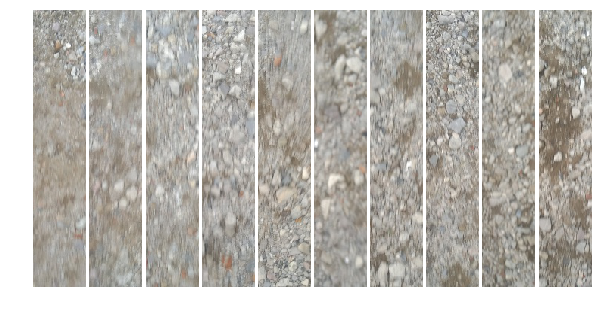

In [8]:
# Plot Beispiel Bilder
fig = plt.figure(1, figsize=(10,10))
# Anzahl der Bilder >= 10
imageToShow = 10
# Start Index des ersten Bildes
grid = ImageGrid(fig, 111, nrows_ncols=(int(imageToShow/10), 10), axes_pad=0.05)
for i, img in enumerate(images[startIndex: startIndex + imageToShow]):
    ax = grid[i]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
plt.savefig("schwereErschütterungReferenzstrecke.png")

In [11]:
i = startIndex
counter = 0
accZSum = 0
while i <= stopIndex:
    accZ = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    print(accZ)
    accZSum = accZSum + accZ
    i = i + 1
    counter = counter + 1

6.69653
8.2377
7.50788
10.27772
5.74694
7.22992
6.1292800000000005
4.70868
4.82619
4.26116
3.6432599999999997
5.19342
5.48682
5.3629
3.7335300000000005
8.48278
6.08752
4.87249
3.88058
4.37962
4.00087
5.52656
3.7510199999999996
3.4189
4.09006
4.27043
4.02936
5.935569999999999
6.5666199999999995
5.05002
7.37563
5.89575
6.856439999999999
6.1187
7.957160000000001
7.20688
9.17463
8.00581
8.72167
6.85615
5.44844
9.92345
9.57052
8.37717
7.1323
7.599289999999999
7.58598
11.79503
9.95098
8.668439999999999
8.08859
5.18703
6.85266
6.89785
8.66196
9.43087
10.98333
7.3592
13.54951
6.44722
5.799919999999999
6.33435
5.78541
7.33005
6.8638699999999995
10.27252
9.11317
8.51844
8.94674
16.08015
7.5091399999999995
6.84443
6.26474
8.63232
9.05551
9.08606
8.96439
7.19295
7.273280000000001
7.9062399999999995
9.14035
7.28291
6.35884
7.11522
7.24345
6.41296
4.94032
6.704960000000001
4.8486199999999995
4.3560099999999995
3.97626
3.43486
5.48729
6.50279
6.1676
5.99233
8.21102
9.2493
8.290280000000001
6.58245
5.

In [12]:
counter

267

In [13]:
accZSum / counter

7.29199921348315

In [8]:
# Daten mit leichter Erschütterung
startIndex = 8500
stopIndex = 9350
i = startIndex
counter = 0
accZSum = 0
while i <= stopIndex:
    accZ = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    print(accZ)
    accZSum = accZSum + accZ
    i = i + 1
    counter = counter + 1

1.2724600000000001
1.06071
1.25678
1.12558
1.3599299999999999
2.8359900000000002
1.26829
1.8591900000000001
1.3603299999999998
1.44918
1.33229
1.36046
1.6372200000000001
1.07053
1.53888
1.67467
1.63979
0.9051600000000001
1.34919
1.4963799999999998
1.30034
0.85515
1.74252
1.17465
1.9338799999999998
1.09654
1.9139599999999999
2.2923400000000003
1.56733
1.5351299999999999
1.7810400000000002
1.63076
2.22954
1.40565
1.8691799999999998
1.5292700000000001
1.5983399999999999
1.67127
1.47425
1.1461
1.3158299999999998
2.12431
1.19089
1.3472600000000001
1.6299
1.2274100000000001
1.4598799999999998
1.69537
2.24982
2.2983700000000002
1.7891400000000002
1.3567799999999999
1.49509
1.17581
1.31799
1.33538
1.9202299999999999
1.63953
2.43003
1.72016
1.1737799999999998
1.8157599999999998
1.4408299999999998
1.45612
0.809
1.8459400000000001
1.57236
1.32541
1.14504
1.20036
2.08406
1.7276900000000002
1.11904
1.01417
1.6957900000000001
3.27263
3.3654800000000002
1.26871
0.81666
1.36649
1.4066299999999998
1.22

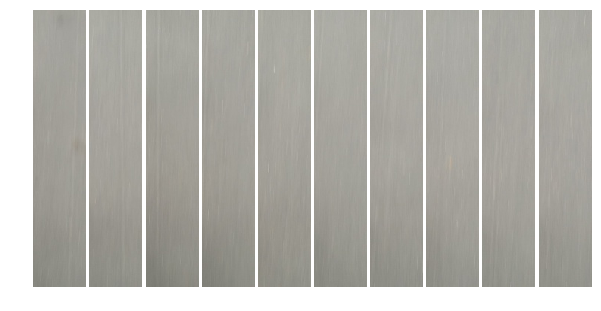

In [10]:
# Plot Beispiel Bilder
fig = plt.figure(1, figsize=(10,10))
# Anzahl der Bilder >= 10
imageToShow = 10
# Start Index des ersten Bildes
grid = ImageGrid(fig, 111, nrows_ncols=(int(imageToShow/10), 10), axes_pad=0.05)
for i, img in enumerate(images[startIndex: startIndex + imageToShow]):
    ax = grid[i]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
plt.savefig("leichteErschütterungReferenzstrecke.png")

In [9]:
accZSum / counter

1.4935777320799042

### Versuch 2

In [115]:
maxVibration = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].max()
maxVibration

26.781079999999999

In [116]:
##### Fuzzy System ####

# Wertebereich 
vibration          = np.arange(0,maxVibration,0.001)
smoothness         = np.arange(0,4           ,1    )
# Fuzzifizierung Zugehörigkeitsfunktionen
vibrationVeryLow   = fuzz.trapmf(vibration, [    0,    0,1.493,3.426])
vibrationLow       = fuzz.trimf (vibration, [1.493,3.426,5.359])
vibrationHigh      = fuzz.trimf (vibration, [3.426,5.359,7.292])
vibrationVeryHigh  = fuzz.trapmf(vibration, [5.359,7.292,maxVibration, maxVibration])
# Zuordnung der Ausgangsgrößen
smoothnessVeryGood = fuzz.trimf (smoothness,[0,0,1]) 
smoothnessGood     = fuzz.trimf (smoothness,[0,1,2]) 
smoothnessBad      = fuzz.trimf (smoothness,[1,2,3]) 
smoothnessVeryBad  = fuzz.trimf (smoothness,[2,3,4]) 

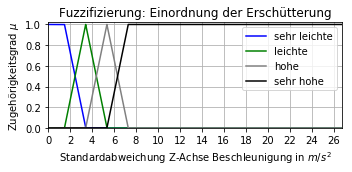

In [119]:
# Plot Fuzzifizierung
plt.figure(figsize=(5,2.5))
plt.plot(vibration, vibrationVeryLow,  c='blue',  label='sehr leichte')
plt.plot(vibration, vibrationLow,      c='green', label='leichte')
plt.plot(vibration, vibrationHigh,     c='gray',  label='hohe')
plt.plot(vibration, vibrationVeryHigh, c='k',     label='sehr hohe')
plt.legend()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Standardabweichung Z-Achse Beschleunigung in $m/s^2$")
plt.title("Fuzzifizierung: Einordnung der Erschütterung")
plt.ylim(0,1.02)
plt.xlim(0,maxVibration)
plt.xticks(np.arange(0, maxVibration, 2))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.grid()
plt.tight_layout()
plt.savefig("fuzzifizierungVersuch2.png")

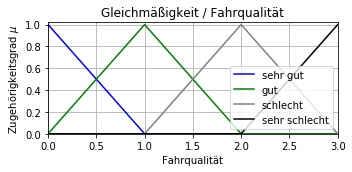

In [123]:
# PLot Gleichmäßigkeit / Fahrqualität
plt.figure(figsize=(5,2.5))
plt.plot(smoothness, smoothnessVeryGood, c='blue',  label='sehr gut')
plt.plot(smoothness, smoothnessGood,     c='green', label='gut')
plt.plot(smoothness, smoothnessBad,      c='gray',  label='schlecht')
plt.plot(smoothness, smoothnessVeryBad,  c='k',     label='sehr schlecht')
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität")
plt.xlim(0,3)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim(0,1.02)
plt.legend(loc=4)
plt.title("Gleichmäßigkeit / Fahrqualität")
plt.tight_layout()
plt.savefig("fahrqualitaetVersuch2.png")

In [124]:
index = 17713
accZValue = 3 #featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[index]
vibrationLevelVeryLow  = fuzz.interp_membership(vibration, vibrationVeryLow,  accZValue)
vibrationLevelLow      = fuzz.interp_membership(vibration, vibrationLow,      accZValue)
vibrationLevelHigh     = fuzz.interp_membership(vibration, vibrationHigh,     accZValue)
vibrationLevelVeryHigh = fuzz.interp_membership(vibration, vibrationVeryHigh, accZValue)

In [125]:
# Berechne Implikation
# Numpy fmin Dokumentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fmin.html
# Regel 1: Wenn die Erschütterung a sehr leicht ist, dann ist die Fahrqualität sehr gut.
# Regel 2: Wenn  die Erschütterung a leicht ist, dann ist die Fahrqualität gut.
# Regel 3: Wenn die Erschütterung a hoch ist, dann ist die Fahrqualität schlecht.
# Regel 4: Wenn die Erschütterung a sehr hoch ist, dann ist die Fahrqualität sehr schlecht.
rule1 = np.fmin(vibrationLevelVeryLow,  smoothnessVeryGood) 
rule2 = np.fmin(vibrationLevelLow,      smoothnessGood)
rule3 = np.fmin(vibrationLevelHigh,     smoothnessBad)
rule4 = np.fmin(vibrationLevelVeryHigh, smoothnessVeryBad)
# Numpy Array mit 0, um Zugrhörigkeitsfläche darzustellen
smoothZeros  = np.zeros_like(smoothness)

Text(0.5,1,'Grad der Zugehörigkeit jeder Stufe')

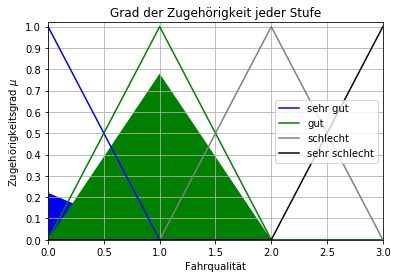

In [126]:
# Plot Aggregation
plt.fill_between(smoothness, smoothZeros, rule1, facecolor='b')
plt.plot(smoothness, smoothnessVeryGood, c='b', label="sehr gut")
plt.fill_between(smoothness, smoothZeros, rule2, facecolor='g')
plt.plot(smoothness, smoothnessGood, c='g', label="gut")
plt.fill_between(smoothness, smoothZeros, rule3, facecolor='gray')
plt.plot(smoothness, smoothnessBad, c='gray', label="schlecht")
plt.fill_between(smoothness, smoothZeros, rule4, facecolor='k')
plt.plot(smoothness, smoothnessVeryBad, 'k', label="sehr schlecht")
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität")
plt.xlim(0,3)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0,1.02)
plt.legend(loc=5)
plt.title("Grad der Zugehörigkeit jeder Stufe")

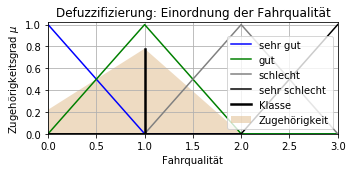

In [133]:
# Akkumalation
plt.figure(figsize=(5,2.5))
accmulation = np.fmax(np.fmax(rule1, rule2),np.fmax(rule3, rule4))
quality = fuzz.defuzz(smoothness, accmulation, 'mom')
qualityActivation = fuzz.interp_membership(smoothness, accmulation, quality) 
# Plot Defuzzifizierung und Akkumalation
plt.plot(smoothness, smoothnessVeryGood, 'b', label="sehr gut" )
plt.plot(smoothness, smoothnessGood, 'g', label="gut")
plt.plot(smoothness, smoothnessBad, c='gray', label="schlecht")
plt.plot(smoothness, smoothnessVeryBad, 'k', label="sehr schlecht")
plt.fill_between(smoothness, smoothZeros, accmulation, facecolor='burlywood', alpha=0.5, label="Zugehörigkeit")
plt.plot([quality, quality], [0, qualityActivation], 'k', linewidth=2.5, label="Klasse")
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität")
plt.xlim(0,3)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim(0,1.02)
plt.legend(loc=4)
plt.title("Defuzzifizierung: Einordnung der Fahrqualität")
plt.tight_layout()
plt.savefig("defuzzifizierungValue3_Versuch2.png")

In [52]:
quality

1.0

In [53]:
round(2.5)

2

<b>Labeln der Daten

In [54]:
featuresDf["Klasse"] = 0
maxIndex = featuresDf.shape[0]
i = 0
classLabels = []
label = 0
while i < maxIndex:
    accZValue = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    vibrationLevelVeryLow  = fuzz.interp_membership(vibration, vibrationVeryLow,  accZValue)
    vibrationLevelLow      = fuzz.interp_membership(vibration, vibrationLow,      accZValue)
    vibrationLevelHigh     = fuzz.interp_membership(vibration, vibrationHigh,     accZValue)
    vibrationLevelVeryHigh = fuzz.interp_membership(vibration, vibrationVeryHigh, accZValue)
    rule1 = np.fmin(vibrationLevelVeryLow,  smoothnessVeryGood)
    rule2 = np.fmin(vibrationLevelLow,      smoothnessGood)
    rule3 = np.fmin(vibrationLevelHigh,     smoothnessBad)
    rule4 = np.fmin(vibrationLevelVeryHigh, smoothnessVeryBad)
    accmulation = np.fmax(np.fmax(rule1, rule2),np.fmax(rule3, rule4))
    label = fuzz.defuzz(smoothness, accmulation, 'mom')    
    classLabels.append(int(label))
    i = i + 1
featuresDf["Klasse"] = classLabels

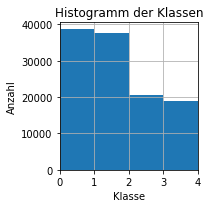

In [72]:
plt.figure(figsize=(3,3))
plt.xticks(np.arange(0, 7.1, step=1))
plt.xlim(0,4)
plt.xlabel("Klasse")
plt.ylabel("Anzahl")
plt.title("Histogramm der Klassen")
featuresDf["Klasse"].hist(bins=[0,1,2,3,4,5])
plt.tight_layout()
plt.savefig("histogrammKlassenVersuch4_2.png")

In [18]:
featuresDf.set_index('Zeitstempel in Unixzeit', inplace=True)
featuresDf.to_csv('../daten/merkmale_datensatz_37_bis_42//merkmaleMitLabeln.csv')

### Versuch 3

In [75]:
# Berechnet den Median der Geschwindigkeitsmessungswerte 
featuresDf["Geschwindigkeit in km/h"].max()

30.924002000000002

In [91]:
##### Fuzzy System Versuch 3 ####
maxVibration = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].max()
# Wetebereich 
vibration          = np.arange(0,maxVibration,0.001)
smoothness         = np.arange(0,8           ,1    )
velocity           = np.arange(0,32 ,0.001)

# Fuzzifizierung Zugehörigkeitsfunktionen
vibrationVeryLow   = fuzz.trapmf(vibration, [    0,    0,1.493,3.426])
vibrationLow       = fuzz.trimf (vibration, [1.493,3.426,5.359])
vibrationHigh      = fuzz.trimf (vibration, [3.426,5.359,7.292])
vibrationVeryHigh  = fuzz.trapmf(vibration, [5.359,7.292,maxVibration, maxVibration])
velocityLow        = fuzz.trimf(velocity,   [    0,    0,32])
velocityHigh       = fuzz.trimf(velocity,   [    0,   32,32]) 

# Zuordnung der Ausgangsgrößen
smoothnessVeryGoodLowVelo  = fuzz.trimf (smoothness,[0,0,1]) 
smoothnessGoodLowVelo      = fuzz.trimf (smoothness,[0,1,2]) 
smoothnessBadLowVelo       = fuzz.trimf (smoothness,[1,2,3]) 
smoothnessVeryBadLowVelo   = fuzz.trimf (smoothness,[2,3,4]) 
smoothnessVeryGoodHighVelo = fuzz.trimf (smoothness,[3,4,5]) 
smoothnessGoodHighVelo     = fuzz.trimf (smoothness,[4,5,6]) 
smoothnessBadHighVelo      = fuzz.trimf (smoothness,[5,6,7]) 
smoothnessVeryBadHighVelo  = fuzz.trimf (smoothness,[6,7,8]) 

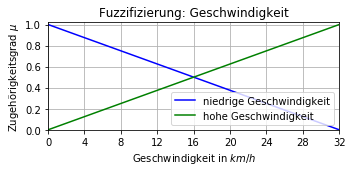

In [102]:
# Plot Fuzzifizierung
plt.figure(figsize=(5,2.5))
plt.plot(velocity, velocityLow,  c='blue',  label='niedrige Geschwindigkeit')
plt.plot(velocity, velocityHigh, c='green', label='hohe Geschwindigkeit')
plt.legend(loc=4)
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Geschwindigkeit in $km/h$")
plt.title("Fuzzifizierung: Geschwindigkeit")
plt.ylim(0,1.02)
plt.xlim(0,32.01)
plt.xticks(np.arange(0, 32.01, 4))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.grid()
plt.tight_layout()
plt.savefig("fuzzifizierungGeschwindigkeitVersuch3.png")

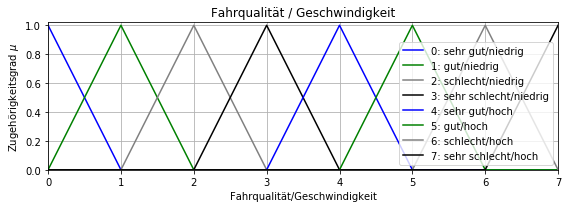

In [114]:
# PLot Fahrqualität / Geschwindigkeitsbereich
plt.figure(figsize=(8,3))
plt.plot(smoothness, smoothnessVeryGoodLowVelo,  c='blue',  label='0: sehr gut/niedrig')
plt.plot(smoothness, smoothnessGoodLowVelo,      c='green', label='1: gut/niedrig')
plt.plot(smoothness, smoothnessBadLowVelo,       c='gray',  label='2: schlecht/niedrig')
plt.plot(smoothness, smoothnessVeryBadLowVelo,   c='k',     label='3: sehr schlecht/niedrig')
plt.plot(smoothness, smoothnessVeryGoodHighVelo, c='b',     label="4: sehr gut/hoch" )
plt.plot(smoothness, smoothnessGoodHighVelo,     c='g',     label="5: gut/hoch")
plt.plot(smoothness, smoothnessBadHighVelo,      c='gray',  label="6: schlecht/hoch")
plt.plot(smoothness, smoothnessVeryBadHighVelo,  c='k',     label="7: sehr schlecht/hoch")
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität/Geschwindigkeit")
plt.xlim(0,7)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim(0,1.02)
plt.legend(loc=4)
plt.title("Fahrqualität / Geschwindigkeit")
plt.tight_layout()
plt.savefig("fahrqualitaetVersuch3.png")

In [44]:
accZValue = 6.3255 
velValue  = 10.0
# Interpretation der Zugehörigkeit 
vibrationLevelVeryLow  = fuzz.interp_membership(vibration, vibrationVeryLow,  accZValue)
vibrationLevelLow      = fuzz.interp_membership(vibration, vibrationLow,      accZValue)
vibrationLevelHigh     = fuzz.interp_membership(vibration, vibrationHigh,     accZValue)
vibrationLevelVeryHigh = fuzz.interp_membership(vibration, vibrationVeryHigh, accZValue)
velocityLevelLow       = fuzz.interp_membership(velocity,  velocityLow,        velValue)
velocityLevelHigh      = fuzz.interp_membership(velocity,  velocityHigh,       velValue)

In [45]:
# Berechne Implikation
# Numpy fmin Dokumentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fmin.html
# Regel 1: Wenn die Erschütterung a sehr leicht ist und die Geschwindigkeit v niedrig ist, dann ist die Fahrqualität sehr gut bei niedriger Geschwindigkeit.
# Regel 2: Wenn die Erschütterung a leicht ist und die Geschwindigkeit  v niedrig ist, dann ist die Fahrqualität gut bei niedriger Geschwindigkeit.
# Regel 3: Wenn die Erschütterung a hoch ist und die Geschwindigkeit v niedrig ist, dann ist die Fahrqualität schlecht bei niedriger Geschwindigkeit.
# Regel 4: Wenn die Erschütterung a sehr hoch ist und die Geschwindigkeit  v niedrig ist, dann ist die Fahrqualität sehr schlecht bei niedriger Geschwindigkeit.
# Regel 5: Wenn die Erschütterung a sehr leicht ist und die Geschwindigkeit v hoch ist, dann ist die Fahrqualität sehr gut bei hoher Geschwindigkeit.
# Regel 6: Wenn die Erschütterung a leicht ist und die Geschwindigkeit v hoch ist, dann ist die Fahrqualität gut bei hoher Geschwindigkeit.
# Regel 7: Wenn die Erschütterung a hoch ist und die Geschwindigkeit v hoch ist, dann ist die Fahrqualität schlecht bei hoher Geschwindigkeit.
# Regel 8: Wenn die Erschütterung a sehr hoch ist und die Geschwindigkeit v hoch ist, dann ist die Fahrqualität sehr schlecht bei hoher Geschwindigkeit.
rule1 = np.fmin(vibrationLevelVeryLow,  velocityLevelLow) 
rule2 = np.fmin(vibrationLevelLow,      velocityLevelLow)
rule3 = np.fmin(vibrationLevelHigh,     velocityLevelLow)
rule4 = np.fmin(vibrationLevelVeryHigh, velocityLevelLow)
rule5 = np.fmin(vibrationLevelVeryLow,  velocityLevelHigh) 
rule6 = np.fmin(vibrationLevelLow,      velocityLevelHigh)
rule7 = np.fmin(vibrationLevelHigh,     velocityLevelHigh)
rule8 = np.fmin(vibrationLevelVeryHigh, velocityLevelHigh)
# Numpy Array mit 0, um Zugrhörigkeitsfläche darzustellen
smoothZeros  = np.zeros_like(smoothness)

In [46]:
rule1Activation = np.fmin(rule1, smoothnessVeryGoodLowVelo)
rule2Activation = np.fmin(rule2, smoothnessGoodLowVelo)
rule3Activation = np.fmin(rule3, smoothnessBadLowVelo)
rule4Activation = np.fmin(rule4, smoothnessVeryBadLowVelo)
rule5Activation = np.fmin(rule5, smoothnessVeryGoodHighVelo)
rule6Activation = np.fmin(rule6, smoothnessGoodHighVelo)
rule7Activation = np.fmin(rule7, smoothnessBadHighVelo)
rule8Activation = np.fmin(rule8, smoothnessVeryBadHighVelo)

Text(0.5,1,'Ausgangsgrößen')

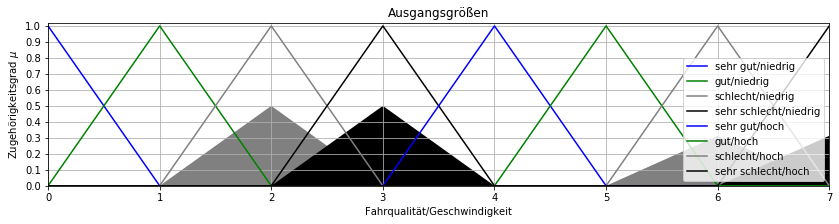

In [47]:
# Plot Aggregation
plt.figure(figsize=(14,3))
plt.fill_between(smoothness, smoothZeros, rule1Activation, facecolor='b')
plt.plot(smoothness, smoothnessVeryGoodLowVelo, c='b', label="sehr gut/niedrig")
plt.fill_between(smoothness, smoothZeros, rule2Activation, facecolor='g')
plt.plot(smoothness, smoothnessGoodLowVelo, c='g', label="gut/niedrig")
plt.fill_between(smoothness, smoothZeros, rule3Activation, facecolor='gray')
plt.plot(smoothness, smoothnessBadLowVelo, c='gray', label="schlecht/niedrig")
plt.fill_between(smoothness, smoothZeros, rule4Activation, facecolor='k')
plt.plot(smoothness, smoothnessVeryBadLowVelo, 'k', label="sehr schlecht/niedrig")
plt.fill_between(smoothness, smoothZeros, rule5Activation, facecolor='b')
plt.plot(smoothness, smoothnessVeryGoodHighVelo, c='b', label="sehr gut/hoch")
plt.fill_between(smoothness, smoothZeros, rule6Activation, facecolor='g')
plt.plot(smoothness, smoothnessGoodHighVelo, c='g', label="gut/hoch")
plt.fill_between(smoothness, smoothZeros, rule7Activation, facecolor='gray')
plt.plot(smoothness, smoothnessBadHighVelo, c='gray', label="schlecht/hoch")
plt.fill_between(smoothness, smoothZeros, rule8Activation, facecolor='k')
plt.plot(smoothness, smoothnessVeryBadHighVelo, 'k', label="sehr schlecht/hoch")
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität/Geschwindigkeit")
plt.xlim(0,7)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0,1.02)
plt.legend(loc=4)
plt.title("Ausgangsgrößen")

Text(0.5,1,'Defuzzifizierung: Einordnung der Fahrqualität')

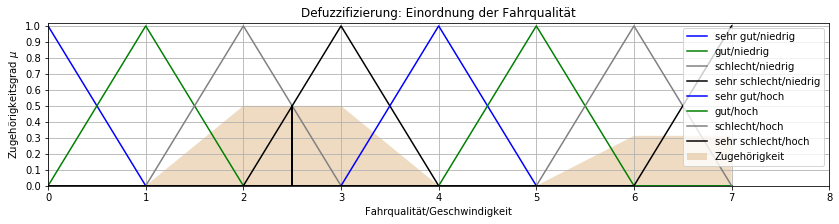

In [48]:
# Akkumalation
accmulation = np.fmax(np.fmax(np.fmax(rule1Activation, rule2Activation),np.fmax(rule3Activation, rule4Activation)),
                      np.fmax(np.fmax(rule5Activation, rule6Activation),np.fmax(rule7Activation, rule8Activation)))
quality = fuzz.defuzz(smoothness, accmulation, 'mom')
qualityActivation = fuzz.interp_membership(smoothness, accmulation, quality) 
# Plot Defuzzifizierung und Akkumalation
plt.figure(figsize=(14,3))
plt.plot(smoothness, smoothnessVeryGoodLowVelo, 'b', label="sehr gut/niedrig" )
plt.plot(smoothness, smoothnessGoodLowVelo, 'g', label="gut/niedrig")
plt.plot(smoothness, smoothnessBadLowVelo, c='gray', label="schlecht/niedrig")
plt.plot(smoothness, smoothnessVeryBadLowVelo, 'k', label="sehr schlecht/niedrig")
plt.plot(smoothness, smoothnessVeryGoodHighVelo, 'b', label="sehr gut/hoch" )
plt.plot(smoothness, smoothnessGoodHighVelo, 'g', label="gut/hoch")
plt.plot(smoothness, smoothnessBadHighVelo, c='gray', label="schlecht/hoch")
plt.plot(smoothness, smoothnessVeryBadHighVelo, 'k', label="sehr schlecht/hoch")
plt.fill_between(smoothness, smoothZeros, accmulation, facecolor='burlywood', alpha=0.5, label="Zugehörigkeit")
plt.plot([quality, quality], [0, qualityActivation], 'k', linewidth=2)
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität/Geschwindigkeit")
plt.xlim(0,8)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0,1.02)
plt.legend(loc=1)
plt.title("Defuzzifizierung: Einordnung der Fahrqualität")

In [49]:
featuresDf["Klasse"] = 0
maxIndex = featuresDf.shape[0]
i = 0
classLabels = []
label = 0
while i < maxIndex:
    accZValue = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    velValue  = featuresDf["Geschwindigkeit in km/h"].iloc[i]
    vibrationLevelVeryLow  = fuzz.interp_membership(vibration, vibrationVeryLow,  accZValue)
    vibrationLevelLow      = fuzz.interp_membership(vibration, vibrationLow,      accZValue)
    vibrationLevelHigh     = fuzz.interp_membership(vibration, vibrationHigh,     accZValue)
    vibrationLevelVeryHigh = fuzz.interp_membership(vibration, vibrationVeryHigh, accZValue)
    velocityLevelLow       = fuzz.interp_membership(velocity,  velocityLow,        velValue)
    velocityLevelHigh      = fuzz.interp_membership(velocity,  velocityHigh,       velValue)
    rule1 = np.fmin(vibrationLevelVeryLow,  velocityLevelLow) 
    rule2 = np.fmin(vibrationLevelLow,      velocityLevelLow)
    rule3 = np.fmin(vibrationLevelHigh,     velocityLevelLow)
    rule4 = np.fmin(vibrationLevelVeryHigh, velocityLevelLow)
    rule5 = np.fmin(vibrationLevelVeryLow,  velocityLevelHigh) 
    rule6 = np.fmin(vibrationLevelLow,      velocityLevelHigh)
    rule7 = np.fmin(vibrationLevelHigh,     velocityLevelHigh)
    rule8 = np.fmin(vibrationLevelVeryHigh, velocityLevelHigh)
    rule1Activation = np.fmin(rule1, smoothnessVeryGoodLowVelo)
    rule2Activation = np.fmin(rule2, smoothnessGoodLowVelo)
    rule3Activation = np.fmin(rule3, smoothnessBadLowVelo)
    rule4Activation = np.fmin(rule4, smoothnessVeryBadLowVelo)
    rule5Activation = np.fmin(rule5, smoothnessVeryGoodHighVelo)
    rule6Activation = np.fmin(rule6, smoothnessGoodHighVelo)
    rule7Activation = np.fmin(rule7, smoothnessBadHighVelo)
    rule8Activation = np.fmin(rule8, smoothnessVeryBadHighVelo)
    accmulation = np.fmax(np.fmax(np.fmax(rule1Activation, rule2Activation),np.fmax(rule3Activation, rule4Activation)),
                      np.fmax(np.fmax(rule5Activation, rule6Activation),np.fmax(rule7Activation, rule8Activation)))
    label = fuzz.defuzz(smoothness, accmulation, 'mom')    
    classLabels.append(int(label))
    i = i + 1
featuresDf["Klasse"] = classLabels

In [6]:
featuresDf.set_index('Zeitstempel in Unixzeit', inplace=True)
featuresDf.to_csv('../daten/merkmale_datensatz_37_bis_42//merkmaleMitLabelnFuzzyVersuch3.csv')

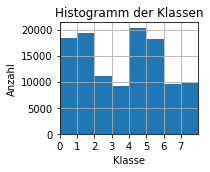

In [53]:
# Versuch 4.4 mit 8 Klassen Histogram 
plt.figure(figsize=(3,2.5))
plt.xticks(np.arange(0, 7.1, step=1))
plt.xlim(0,8)
plt.xlabel("Klasse")
plt.ylabel("Anzahl")
plt.title("Histogramm der Klassen")
featuresDf["Klasse"].hist(bins=[0,1,2,3,4,5,6,7,8])
plt.tight_layout()
plt.savefig("histogrammKlassenFuzzyVersuch3.png")

### Versuch 4

In [4]:
maxVibration = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].max()
maxVibration

26.781079999999999

In [5]:
##### Fuzzy System ####

# Wertebereich 
vibration      = np.arange(0,maxVibration,0.001)
smoothness     = np.arange(0,3           ,1    )
# Fuzzifizierung Zugehörigkeitsfunktionen
vibrationLow   = fuzz.trimf(vibration,  [    0, 0,5])
vibrationMean  = fuzz.trimf (vibration, [    0 ,5,10])
vibrationHigh  = fuzz.trapmf(vibration, [5,10,maxVibration, maxVibration])
# Zuordnung der Ausgangsgrößen
smoothnessGood = fuzz.trimf (smoothness,[0,0,1]) 
smoothnessMean = fuzz.trimf (smoothness,[0,1,2]) 
smoothnessBad  = fuzz.trimf (smoothness,[1,2,2]) 

Text(0.5,1,'Gleichmäßigkeit / Fahrqualität')

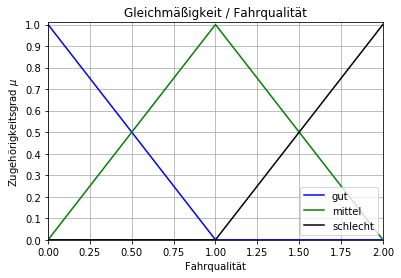

In [75]:
# PLot Gleichmäßigkeit / Fahrqualität
plt.plot(smoothness, smoothnessGood, c='blue',  label='gut')
plt.plot(smoothness, smoothnessMean, c='green', label='mittel')
plt.plot(smoothness, smoothnessBad,  c='k',  label='schlecht')
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität")
plt.xlim(0,2)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0,1.01)
plt.legend(loc=4)
plt.title("Gleichmäßigkeit / Fahrqualität")
#plt.savefig("fahrqualitaetVersuch4.png")

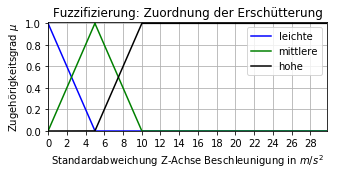

In [28]:
plt.figure(figsize=(5,2))
plt.plot(vibration, vibrationLow,  c='blue',  label='leichte')
plt.plot(vibration, vibrationMean, c='green', label='mittlere')
plt.plot(vibration, vibrationHigh, c='k',     label='hohe')
plt.legend()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Standardabweichung Z-Achse Beschleunigung in $m/s^2$")
plt.title("Fuzzifizierung: Zuordnung der Erschütterung")
plt.ylim(0,1.01)
plt.xlim(0,maxVibration)
plt.xticks(np.arange(0, maxVibration, 2))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.grid()
plt.savefig("fuzzifizierungZAchseVersuch4.png")

In [77]:
accZValue = 3.3255 #featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[index]
vibrationLevelLow  = fuzz.interp_membership(vibration, vibrationLow,  accZValue)
vibrationLevelMean = fuzz.interp_membership(vibration, vibrationMean, accZValue)
vibrationLevelHigh = fuzz.interp_membership(vibration, vibrationHigh, accZValue)

In [78]:
# Berechne Implikation
# Numpy fmin Dokumentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fmin.html
# Regel 1: Wenn die Erschütterung a leicht ist, dann ist die Fahrqualität gut.
# Regel 2: Wenn  die Erschütterung a mittel ist, dann ist die Fahrqualität mittel.
# Regel 3: Wenn die Erschütterung a hoch ist, dann ist die Fahrqualität schlecht.
rule1 = np.fmin(vibrationLevelLow,  smoothnessGood) 
rule2 = np.fmin(vibrationLevelMean, smoothnessMean)
rule3 = np.fmin(vibrationLevelHigh, smoothnessBad)
# Numpy Array mit 0, um Zugrhörigkeitsfläche darzustellen
smoothZeros  = np.zeros_like(smoothness)

Text(0.5,1,'Defuzzifizierung: Einordnung der Fahrqualität')

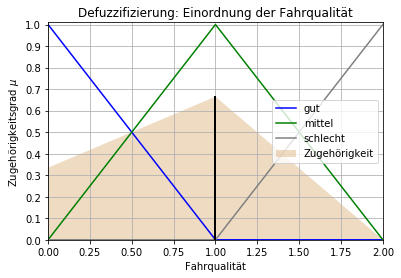

In [79]:
# Akkumalation
accmulation = np.fmax(np.fmax(rule1, rule2),rule3)
quality = fuzz.defuzz(smoothness, accmulation, 'mom')
qualityActivation = fuzz.interp_membership(smoothness, accmulation, quality) 
# Plot Defuzzifizierung und Akkumalation
plt.plot(smoothness, smoothnessGood, 'b', label="gut" )
plt.plot(smoothness, smoothnessMean, 'g', label="mittel")
plt.plot(smoothness, smoothnessBad, c='gray', label="schlecht")
plt.fill_between(smoothness, smoothZeros, accmulation, facecolor='burlywood', alpha=0.5, label="Zugehörigkeit")
plt.plot([quality, quality], [0, qualityActivation], 'k', linewidth=2)
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität")
plt.xlim(0,2)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0,1.01)
plt.legend(loc=5)
plt.title("Defuzzifizierung: Einordnung der Fahrqualität")
#plt.savefig("defuzzifizierungValue_Versuch3.png")

In [80]:
quality

1.0

In [81]:
# Klassifizierung der Daten
featuresDf["Klasse"] = 0
maxIndex = featuresDf.shape[0]
i = 0
classLabels = []
label = 0
while i < maxIndex:
    accZValue = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    vibrationLevelLow  = fuzz.interp_membership(vibration, vibrationLow,  accZValue)
    vibrationLevelMean = fuzz.interp_membership(vibration, vibrationMean,      accZValue)
    vibrationLevelHigh = fuzz.interp_membership(vibration, vibrationHigh,     accZValue)
    rule1 = np.fmin(vibrationLevelLow,  smoothnessGood)
    rule2 = np.fmin(vibrationLevelMean,      smoothnessMean)
    rule3 = np.fmin(vibrationLevelHigh,     smoothnessBad)
    accmulation = np.fmax(np.fmax(rule1, rule2),rule3)
    label = fuzz.defuzz(smoothness, accmulation, 'mom')    
    classLabels.append(int(label))
    i = i + 1
featuresDf["Klasse"] = classLabels

In [82]:
featuresDf["Klasse"].value_counts().min()

12290

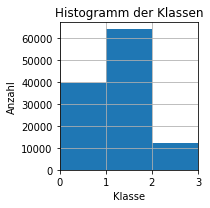

In [84]:
plt.figure(figsize=(3,3))
plt.xticks(np.arange(0, 7.1, step=1))
plt.xlim(0,3)
plt.xlabel("Klasse")
plt.ylabel("Anzahl")
plt.title("Histogramm der Klassen")
featuresDf["Klasse"].hist(bins=[0,1,2,3])
plt.tight_layout()
plt.savefig("histogrammKlassenFuzzyVersuch4.png")

In [ ]:
featuresDf.set_index('Zeitstempel in Unixzeit', inplace=True)
featuresDf.to_csv('../daten/merkmale_datensatz_37_bis_42/merkmaleMitLabelnFuzzyVersuch4.csv')

### Versuch 5

In [3]:
##### Fuzzy System Versuch 5 ####
maxVibration = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].max()
# Wetebereich 
vibration      = np.arange(0,maxVibration,0.001)
smoothness     = np.arange(0,6           ,1    )
velocity       = np.arange(0,32          ,0.001)

# Fuzzifizierung Zugehörigkeitsfunktionen
vibrationLow   = fuzz.trimf(vibration,  [    0, 0,5])
vibrationMean  = fuzz.trimf (vibration, [    0 ,5,10])
vibrationHigh  = fuzz.trapmf(vibration, [5,10,maxVibration, maxVibration])
velocityLow    = fuzz.trimf(velocity,   [    0,    0,32])
velocityHigh   = fuzz.trimf(velocity,   [    0,   32,32]) 

# Zuordnung der Ausgangsgrößen
smoothnessGoodLowVelo  = fuzz.trimf (smoothness,[0,0,1]) 
smoothnessMeanLowVelo  = fuzz.trimf (smoothness,[0,1,2]) 
smoothnessBadLowVelo   = fuzz.trimf (smoothness,[1,2,3]) 
smoothnessGoodHighVelo = fuzz.trimf (smoothness,[2,3,4]) 
smoothnessMeanHighVelo = fuzz.trimf (smoothness,[3,4,5]) 
smoothnessBadHighVelo   = fuzz.trimf (smoothness,[4,5,6]) 

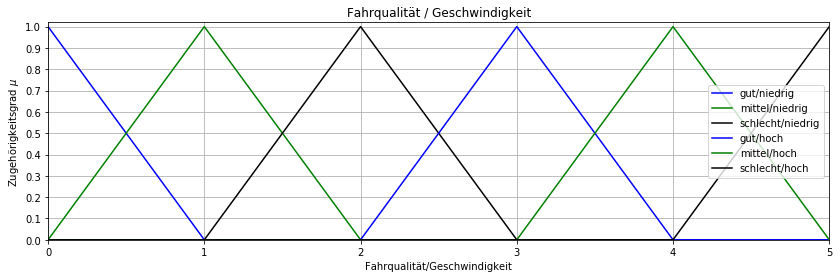

In [15]:
# PLot Fahrqualität / Geschwindigkeitsbereich
plt.figure(figsize=(14,4))
plt.plot(smoothness, smoothnessGoodLowVelo,  c='blue',  label='gut/niedrig')
plt.plot(smoothness, smoothnessMeanLowVelo,  c='green', label='mittel/niedrig')
plt.plot(smoothness, smoothnessBadLowVelo,   c='k',     label='schlecht/niedrig')
plt.plot(smoothness, smoothnessGoodHighVelo, c='blue',  label='gut/hoch')
plt.plot(smoothness, smoothnessMeanHighVelo, c='green', label="mittel/hoch" )
plt.plot(smoothness, smoothnessBadHighVelo,  c='k',     label="schlecht/hoch")
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität/Geschwindigkeit")
plt.xlim(0,5)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0,1.02)
plt.legend(loc=5)
plt.title("Fahrqualität / Geschwindigkeit")
plt.savefig("fahrqualitaetVersuch5.png")

In [5]:
accZValue = 8
velValue  = 12.0
# Interpretation der Zugehörigkeit 
vibrationLevelLow  = fuzz.interp_membership(vibration, vibrationLow,  accZValue)
vibrationLevelMean = fuzz.interp_membership(vibration, vibrationMean,      accZValue)
vibrationLevelHigh = fuzz.interp_membership(vibration, vibrationHigh,     accZValue)
velocityLevelLow   = fuzz.interp_membership(velocity,  velocityLow,        velValue)
velocityLevelHigh  = fuzz.interp_membership(velocity,  velocityHigh,       velValue)

In [6]:
# Berechne Implikation
# Numpy fmin Dokumentation: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fmin.html
# Regel 1: Wenn die Erschütterung a leicht ist und die Geschwindigkeit v niedrig ist, dann ist die Fahrqualität gut bei niedriger Geschwindigkeit.
# Regel 2: Wenn die Erschütterung a mittelmäßig ist und die Geschwindigkeit  v niedrig ist, dann ist die Fahrqualität mittelmäßig bei niedriger Geschwindigkeit.
# Regel 3: Wenn die Erschütterung a hoch ist und die Geschwindigkeit v niedrig ist, dann ist die Fahrqualität schlecht bei niedriger Geschwindigkeit.
# Regel 1: Wenn die Erschütterung a leicht ist und die Geschwindigkeit v hoch ist, dann ist die Fahrqualität gut bei hoher Geschwindigkeit.
# Regel 2: Wenn die Erschütterung a mittelmäßig ist und die Geschwindigkeit  v hoch ist, dann ist die Fahrqualität mittelmäßig bei hoher Geschwindigkeit.
# Regel 3: Wenn die Erschütterung a hoch ist und die Geschwindigkeit v hoch ist, dann ist die Fahrqualität schlecht bei hoher Geschwindigkeit.

rule1 = np.fmin(vibrationLevelLow,  velocityLevelLow) 
rule2 = np.fmin(vibrationLevelMean, velocityLevelLow)
rule3 = np.fmin(vibrationLevelHigh, velocityLevelLow)
rule4 = np.fmin(vibrationLevelLow,  velocityLevelHigh)
rule5 = np.fmin(vibrationLevelMean, velocityLevelHigh) 
rule6 = np.fmin(vibrationLevelHigh, velocityLevelHigh)
# Numpy Array mit 0, um Zugrhörigkeitsfläche darzustellen
smoothZeros  = np.zeros_like(smoothness)

In [7]:
rule1Activation = np.fmin(rule1, smoothnessGoodLowVelo)
rule2Activation = np.fmin(rule2, smoothnessMeanLowVelo)
rule3Activation = np.fmin(rule3, smoothnessBadLowVelo)
rule4Activation = np.fmin(rule4, smoothnessGoodLowVelo)
rule5Activation = np.fmin(rule5, smoothnessMeanHighVelo)
rule6Activation = np.fmin(rule6, smoothnessBadHighVelo)

Text(0.5,1,'Ausgangsgrößen')

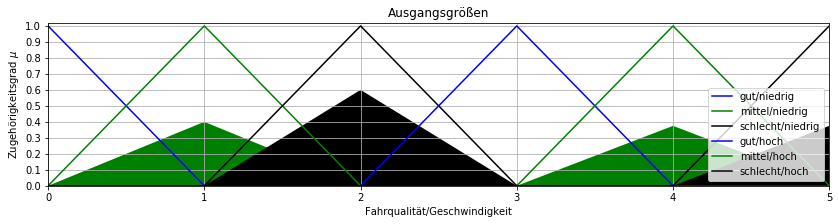

In [8]:
# Plot Aggregation
plt.figure(figsize=(14,3))
plt.fill_between(smoothness, smoothZeros, rule1Activation, facecolor='b')
plt.plot(smoothness, smoothnessGoodLowVelo, c='b', label="gut/niedrig")
plt.fill_between(smoothness, smoothZeros, rule2Activation, facecolor='g')
plt.plot(smoothness, smoothnessMeanLowVelo, c='g', label="mittel/niedrig")
plt.fill_between(smoothness, smoothZeros, rule3Activation, facecolor='k')
plt.plot(smoothness, smoothnessBadLowVelo, c='k', label="schlecht/niedrig")

plt.fill_between(smoothness, smoothZeros, rule4Activation, facecolor='b')
plt.plot(smoothness, smoothnessGoodHighVelo, c='b', label="gut/hoch")
plt.fill_between(smoothness, smoothZeros, rule5Activation, facecolor='g')
plt.plot(smoothness, smoothnessMeanHighVelo, c='g', label="mittel/hoch")
plt.fill_between(smoothness, smoothZeros, rule6Activation, facecolor='k')
plt.plot(smoothness, smoothnessBadHighVelo, c='k', label="schlecht/hoch")
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität/Geschwindigkeit")
plt.xlim(0,5)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0,1.02)
plt.legend(loc=4)
plt.title("Ausgangsgrößen")

Text(0.5,1,'Defuzzifizierung: Einordnung der Fahrqualität')

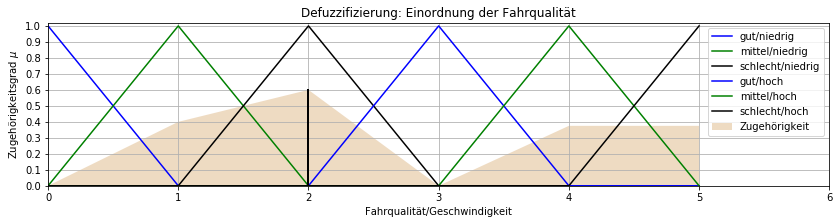

In [9]:
# Akkumalation
accmulation = np.fmax(np.fmax(np.fmax(rule1Activation, rule2Activation),np.fmax(rule3Activation, rule4Activation)),
                      np.fmax(rule5Activation, rule6Activation))
quality = fuzz.defuzz(smoothness, accmulation, 'mom')
qualityActivation = fuzz.interp_membership(smoothness, accmulation, quality) 
# Plot Defuzzifizierung und Akkumalation
plt.figure(figsize=(14,3))
plt.plot(smoothness, smoothnessGoodLowVelo,    'b', label="gut/niedrig" )
plt.plot(smoothness, smoothnessMeanLowVelo,    'g', label="mittel/niedrig")
plt.plot(smoothness, smoothnessBadLowVelo,   c='k', label="schlecht/niedrig")
plt.plot(smoothness, smoothnessGoodHighVelo,   'b', label="gut/hoch" )
plt.plot(smoothness, smoothnessMeanHighVelo,   'g', label="mittel/hoch")
plt.plot(smoothness, smoothnessBadHighVelo,  c='k', label="schlecht/hoch")
plt.fill_between(smoothness, smoothZeros, accmulation, facecolor='burlywood', alpha=0.5, label="Zugehörigkeit")
plt.plot([quality, quality], [0, qualityActivation], 'k', linewidth=2)
plt.grid()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Fahrqualität/Geschwindigkeit")
plt.xlim(0,6)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0,1.02)
plt.legend(loc=1)
plt.title("Defuzzifizierung: Einordnung der Fahrqualität")

In [10]:
featuresDf["Klasse"] = 0
maxIndex = featuresDf.shape[0]
i = 0
classLabels = []
label = 0
while i < maxIndex:
    accZValue = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    velValue  = featuresDf["Geschwindigkeit in km/h"].iloc[i]
    vibrationLevelLow  = fuzz.interp_membership(vibration, vibrationLow,  accZValue)
    vibrationLevelMean = fuzz.interp_membership(vibration, vibrationMean, accZValue)
    vibrationLevelHigh = fuzz.interp_membership(vibration, vibrationHigh, accZValue)
    velocityLevelLow   = fuzz.interp_membership(velocity,  velocityLow,   velValue)
    velocityLevelHigh  = fuzz.interp_membership(velocity,  velocityHigh,  velValue)
    rule1 = np.fmin(vibrationLevelLow,  velocityLevelLow) 
    rule2 = np.fmin(vibrationLevelMean, velocityLevelLow)
    rule3 = np.fmin(vibrationLevelHigh, velocityLevelLow)
    rule4 = np.fmin(vibrationLevelLow,  velocityLevelHigh)
    rule5 = np.fmin(vibrationLevelMean, velocityLevelHigh) 
    rule6 = np.fmin(vibrationLevelHigh, velocityLevelHigh)
    rule1Activation = np.fmin(rule1, smoothnessGoodLowVelo)
    rule2Activation = np.fmin(rule2, smoothnessMeanLowVelo)
    rule3Activation = np.fmin(rule3, smoothnessBadLowVelo)
    rule4Activation = np.fmin(rule4, smoothnessGoodHighVelo)
    rule5Activation = np.fmin(rule5, smoothnessMeanHighVelo)
    rule6Activation = np.fmin(rule6, smoothnessBadHighVelo)
    accmulation = np.fmax(np.fmax(np.fmax(rule1Activation, rule2Activation),np.fmax(rule3Activation, rule4Activation)),
                      np.fmax(rule5Activation, rule6Activation))
    label = fuzz.defuzz(smoothness, accmulation, 'mom')    
    classLabels.append(int(label))
    i = i + 1
featuresDf["Klasse"] = classLabels

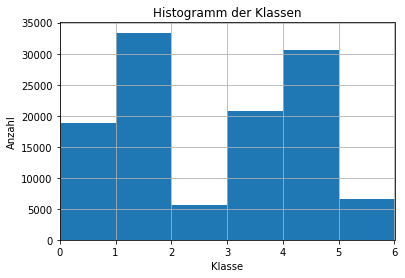

In [11]:
plt.xticks(np.arange(0, 7.1, step=1))
plt.xlim(0,6)
plt.xlabel("Klasse")
plt.ylabel("Anzahl")
plt.title("Histogramm der Klassen")
featuresDf["Klasse"].hist(bins=[0,1,2,3,4,5,6])
plt.savefig("histogrammKlassenFuzzyVersuch5.png")

In [12]:
featuresDf.set_index('Zeitstempel in Unixzeit', inplace=True)
featuresDf.to_csv('../daten/merkmale_datensatz_37_bis_42/merkmaleMitLabelnFuzzyVersuch5.csv')

In [13]:
featuresDf['Klasse'].value_counts()

1    33376
4    30532
3    20815
0    18776
5     6607
2     5684
Name: Klasse, dtype: int64

### Versuch 6: Einordnung der Datensätze 43 und 45 bis 51

In [41]:
featuresDf = pandas.read_csv(filepath_or_buffer="../daten/merkmale_datensatz_52/merkmale.csv")

In [42]:
maxVibration = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].max()
maxVibration

24.22569

In [43]:
##### Fuzzy System ####

# Wertebereich 
vibration      = np.arange(0,maxVibration,0.001)
smoothness     = np.arange(0,3           ,1    )
# Fuzzifizierung Zugehörigkeitsfunktionen
vibrationLow   = fuzz.trimf(vibration,  [    0, 0,5])
vibrationMean  = fuzz.trimf (vibration, [    0 ,5,10])
vibrationHigh  = fuzz.trapmf(vibration, [5,10,maxVibration, maxVibration])
# Zuordnung der Ausgangsgrößen
smoothnessGood = fuzz.trimf (smoothness,[0,0,1]) 
smoothnessMean = fuzz.trimf (smoothness,[0,1,2]) 
smoothnessBad  = fuzz.trimf (smoothness,[1,2,2]) 

In [44]:
# Klassifizierung der Daten
featuresDf["Klasse"] = 0
maxIndex = featuresDf.shape[0]
i = 0
classLabels = []
label = 0
while i < maxIndex:
    accZValue = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    vibrationLevelLow  = fuzz.interp_membership(vibration, vibrationLow,  accZValue)
    vibrationLevelMean = fuzz.interp_membership(vibration, vibrationMean,      accZValue)
    vibrationLevelHigh = fuzz.interp_membership(vibration, vibrationHigh,     accZValue)
    rule1 = np.fmin(vibrationLevelLow,  smoothnessGood)
    rule2 = np.fmin(vibrationLevelMean,      smoothnessMean)
    rule3 = np.fmin(vibrationLevelHigh,     smoothnessBad)
    accmulation = np.fmax(np.fmax(rule1, rule2),rule3)
    label = fuzz.defuzz(smoothness, accmulation, 'mom')    
    classLabels.append(int(label))
    i = i + 1
featuresDf["Klasse"] = classLabels

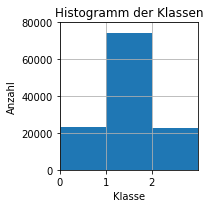

In [22]:
plt.figure(figsize=(3,3))
plt.yticks(np.arange(0, 100000, step=20000))
plt.xticks(np.arange(0, 2.1, step=1))
plt.ylim(0,80000)
plt.xlim(0,3)
plt.xlabel("Klasse")
plt.ylabel("Anzahl")
plt.title("Histogramm der Klassen")
featuresDf["Klasse"].hist(bins=[0,1,2,3])
plt.tight_layout()
plt.savefig("histogrammKlassenFuzzyVersuch6.png")

In [7]:
featuresDf['Klasse'].value_counts()

1    5224
0    2388
2    1436
Name: Klasse, dtype: int64

In [45]:
featuresDf.set_index('Zeitstempel in Unixzeit', inplace=True)
featuresDf.to_csv('../daten/merkmale_datensatz_52/merkmaleMitLabelnFuzzyVersuch6.csv')

#### Versuch 7

In [29]:
featuresDf = pandas.read_csv(filepath_or_buffer="../daten/merkmale_datensatz_43_45_bis_51/merkmale.csv")

In [30]:
##### Fuzzy System Versuch 7 ####
maxVibration = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].max()
# Wetebereich 
vibration      = np.arange(0,maxVibration,0.001)
smoothness     = np.arange(0,6           ,1    )
velocity       = np.arange(0,32          ,0.001)

# Fuzzifizierung Zugehörigkeitsfunktionen
vibrationLow   = fuzz.trimf(vibration,  [    0, 0,5])
vibrationMean  = fuzz.trimf (vibration, [    0 ,5,10])
vibrationHigh  = fuzz.trapmf(vibration, [5,10,maxVibration, maxVibration])
velocityLow    = fuzz.trimf(velocity,   [    0,    0,32])
velocityHigh   = fuzz.trimf(velocity,   [    0,   32,32]) 

# Zuordnung der Ausgangsgrößen
smoothnessGoodLowVelo  = fuzz.trimf (smoothness,[0,0,1]) 
smoothnessMeanLowVelo  = fuzz.trimf (smoothness,[0,1,2]) 
smoothnessBadLowVelo   = fuzz.trimf (smoothness,[1,2,3]) 
smoothnessGoodHighVelo = fuzz.trimf (smoothness,[2,3,4]) 
smoothnessMeanHighVelo = fuzz.trimf (smoothness,[3,4,5]) 
smoothnessBadHighVelo   = fuzz.trimf (smoothness,[4,5,6]) 

In [31]:
featuresDf["Klasse"] = 0
maxIndex = featuresDf.shape[0]
i = 0
classLabels = []
label = 0
while i < maxIndex:
    accZValue = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    velValue  = featuresDf["Geschwindigkeit in km/h"].iloc[i]
    vibrationLevelLow  = fuzz.interp_membership(vibration, vibrationLow,  accZValue)
    vibrationLevelMean = fuzz.interp_membership(vibration, vibrationMean, accZValue)
    vibrationLevelHigh = fuzz.interp_membership(vibration, vibrationHigh, accZValue)
    velocityLevelLow   = fuzz.interp_membership(velocity,  velocityLow,   velValue)
    velocityLevelHigh  = fuzz.interp_membership(velocity,  velocityHigh,  velValue)
    rule1 = np.fmin(vibrationLevelLow,  velocityLevelLow) 
    rule2 = np.fmin(vibrationLevelMean, velocityLevelLow)
    rule3 = np.fmin(vibrationLevelHigh, velocityLevelLow)
    rule4 = np.fmin(vibrationLevelLow,  velocityLevelHigh)
    rule5 = np.fmin(vibrationLevelMean, velocityLevelHigh) 
    rule6 = np.fmin(vibrationLevelHigh, velocityLevelHigh)
    rule1Activation = np.fmin(rule1, smoothnessGoodLowVelo)
    rule2Activation = np.fmin(rule2, smoothnessMeanLowVelo)
    rule3Activation = np.fmin(rule3, smoothnessBadLowVelo)
    rule4Activation = np.fmin(rule4, smoothnessGoodHighVelo)
    rule5Activation = np.fmin(rule5, smoothnessMeanHighVelo)
    rule6Activation = np.fmin(rule6, smoothnessBadHighVelo)
    accmulation = np.fmax(np.fmax(np.fmax(rule1Activation, rule2Activation),np.fmax(rule3Activation, rule4Activation)),
                      np.fmax(rule5Activation, rule6Activation))
    label = fuzz.defuzz(smoothness, accmulation, 'mom')    
    classLabels.append(int(label))
    i = i + 1
featuresDf["Klasse"] = classLabels

In [32]:
featuresDf['Klasse'].value_counts()

1    38339
4    35916
3    13120
2    11544
5    10993
0    10281
Name: Klasse, dtype: int64

In [6]:
featuresDf.set_index('Zeitstempel in Unixzeit', inplace=True)
featuresDf.to_csv('../daten/merkmale_datensatz_43_45_bis_51/merkmaleMitLabelnFuzzyVersuch7.csv')

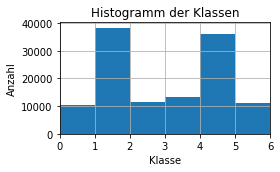

In [38]:
plt.figure(figsize=(4,2.5))
plt.xticks(np.arange(0, 6.1, step=1))
plt.xlim(0,6)
plt.xlabel("Klasse")
plt.ylabel("Anzahl")
plt.title("Histogramm der Klassen")
featuresDf["Klasse"].hist(bins=[0,1,2,3,4,5,6])
plt.tight_layout()
plt.savefig("histogrammKlassenFuzzyVersuch7.png")

#### Versuch 8

In [2]:
featuresDf = pandas.read_csv(filepath_or_buffer="../daten/merkmale_datensatz_52/merkmale.csv")

In [3]:
maxVibration = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].max()
maxVibration

29.784079999999999

In [4]:
##### Fuzzy System ####

# Wertebereich 
vibration      = np.arange(0,maxVibration,0.001)
smoothness     = np.arange(0,3           ,1    )
# Fuzzifizierung Zugehörigkeitsfunktionen
vibrationLow   = fuzz.trapmf(vibration, [0,0,1,6])
vibrationMean  = fuzz.trimf (vibration, [1,6,8])
vibrationHigh  = fuzz.trapmf(vibration, [6,8,maxVibration, maxVibration])
# Zuordnung der Ausgangsgrößen
smoothnessGood = fuzz.trimf (smoothness,[0,0,1]) 
smoothnessMean = fuzz.trimf (smoothness,[0,1,2]) 
smoothnessBad  = fuzz.trimf (smoothness,[1,2,2]) 

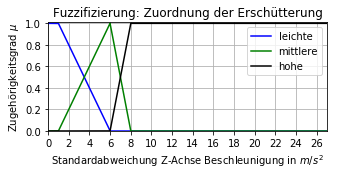

In [5]:
plt.figure(figsize=(5,2))
plt.plot(vibration, vibrationLow,  c='blue',  label='leichte')
plt.plot(vibration, vibrationMean, c='green', label='mittlere')
plt.plot(vibration, vibrationHigh, c='k',     label='hohe')
plt.legend()
plt.ylabel("Zugehörigkeitsgrad $\mu$")
plt.xlabel("Standardabweichung Z-Achse Beschleunigung in $m/s^2$")
plt.title("Fuzzifizierung: Zuordnung der Erschütterung")
plt.ylim(0,1.01)
plt.xlim(0,maxVibration)
plt.xticks(np.arange(0, maxVibration, 2))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.grid()
plt.savefig("fuzzifizierungZAchseVersuch8.png")

In [5]:
# Klassifizierung der Daten
featuresDf["Klasse"] = 0
maxIndex = featuresDf.shape[0]
i = 0
classLabels = []
label = 0
while i < maxIndex:
    accZValue = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    vibrationLevelLow  = fuzz.interp_membership(vibration, vibrationLow,  accZValue)
    vibrationLevelMean = fuzz.interp_membership(vibration, vibrationMean, accZValue)
    vibrationLevelHigh = fuzz.interp_membership(vibration, vibrationHigh, accZValue)
    rule1 = np.fmin(vibrationLevelLow,  smoothnessGood)
    rule2 = np.fmin(vibrationLevelMean,      smoothnessMean)
    rule3 = np.fmin(vibrationLevelHigh,     smoothnessBad)
    accmulation = np.fmax(np.fmax(rule1, rule2),rule3)
    label = fuzz.defuzz(smoothness, accmulation, 'mom')    
    classLabels.append(int(label))
    i = i + 1
featuresDf["Klasse"] = classLabels

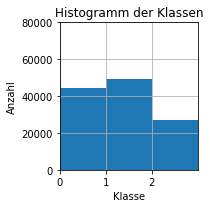

In [7]:
plt.figure(figsize=(3,3))
plt.yticks(np.arange(0, 100000, step=20000))
plt.xticks(np.arange(0, 2.1, step=1))
plt.ylim(0,80000)
plt.xlim(0,3)
plt.xlabel("Klasse")
plt.ylabel("Anzahl")
plt.title("Histogramm der Klassen")
featuresDf["Klasse"].hist(bins=[0,1,2,3])
plt.tight_layout()
plt.savefig("histogrammKlassenFuzzyVersuch8.png")

In [6]:
featuresDf.set_index('Zeitstempel in Unixzeit', inplace=True)
featuresDf.to_csv('../daten/merkmale_datensatz_43_45_bis_51/optimiertXception/merkmaleMitLabelnFuzzyVersuch8_1.csv')

### Versuch 8.2

In [48]:
##### Fuzzy System ####

# Wertebereich 
vibration      = np.arange(0,maxVibration,0.001)
smoothness     = np.arange(0,3           ,1    )
# Fuzzifizierung Zugehörigkeitsfunktionen
vibrationLow   = fuzz.trapmf(vibration, [0,0,1,6])
vibrationMean  = fuzz.trimf (vibration, [1,6,11])
vibrationHigh  = fuzz.trapmf(vibration, [6,11,maxVibration, maxVibration])
# Zuordnung der Ausgangsgrößen
smoothnessGood = fuzz.trimf (smoothness,[0,0,1]) 
smoothnessMean = fuzz.trimf (smoothness,[0,1,2]) 
smoothnessBad  = fuzz.trimf (smoothness,[1,2,2]) 